In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import io
import sys

In [79]:
#1
a = np.random.randint(1, 101, size=20)
b = np.random.randint(1, 101, size=20)
print(a)
print(b)


[35 33  5 41 28  7 73 72 12 34 33 48 23 62 88 37 99 44 86 91]
[35 65 99 47 78  3  1  5 90 14 27  9 79 15 90 42 77 51 63 96]


In [80]:
#2
a = a.reshape(5, 4)
b = b.reshape(5, 4)
print(a)
print(b)


[[35 33  5 41]
 [28  7 73 72]
 [12 34 33 48]
 [23 62 88 37]
 [99 44 86 91]]
[[35 65 99 47]
 [78  3  1  5]
 [90 14 27  9]
 [79 15 90 42]
 [77 51 63 96]]


In [81]:
#3
print(a*b)

[[1225 2145  495 1927]
 [2184   21   73  360]
 [1080  476  891  432]
 [1817  930 7920 1554]
 [7623 2244 5418 8736]]


In [82]:
#4
bnew = b.T
C = a @ bnew
print(bnew)
print(C)

[[35 78 90 79 77]
 [65  3 14 15 51]
 [99  1 27 90 63]
 [47  5  9 42 96]]
[[ 5792  3039  4116  5432  8629]
 [12046  2638  5237 11911 14024]
 [ 8153  1311  2879  6444  9345]
 [15286  2253  5647 12221 14029]
 [19116  8395 12667 20043 24021]]


In [83]:
#5
print(C[:, 1:3])
print(C[:, :], "\n")

[[ 3039  4116]
 [ 2638  5237]
 [ 1311  2879]
 [ 2253  5647]
 [ 8395 12667]]
[[ 5792  3039  4116  5432  8629]
 [12046  2638  5237 11911 14024]
 [ 8153  1311  2879  6444  9345]
 [15286  2253  5647 12221 14029]
 [19116  8395 12667 20043 24021]] 



In [84]:
#6
val = C.max()
ind = C.argmax()
print(f"Max value = {val}")

print(f"index number = {ind}")

Max value = 24021
index number = 24


In [85]:
#7
cnew = C.flatten()
print("c original: ", c)
print("c modified",cnew)


c original:  [[11330  9610 17952  8096  7416]
 [15247 10103 21104  8079 12219]
 [10101  9927 12849 11418  5049]
 [13665 10778 19985  9458  9274]
 [13542  7495 15531  6912  8786]]
c modified [ 5792  3039  4116  5432  8629 12046  2638  5237 11911 14024  8153  1311
  2879  6444  9345 15286  2253  5647 12221 14029 19116  8395 12667 20043
 24021]


In [86]:
#1
csvloc = "/content/subject_scores.csv"
df = pd.read_csv(csvloc)



In [87]:
#2
print(df.head(5))

   Student_ID  Physics  Chemistry  Math  Bilogy
0           1     63.0         37  85.0    94.0
1           2     52.0         63  34.0    24.0
2           3     51.0         25   2.0     7.0
3           4     44.0          2   5.0    22.0
4           5     50.0         13   1.0    12.0


In [88]:
#3
buf = io.StringIO()
df.info(buf=buf)
print(buf.getvalue())
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Student_ID  20 non-null     int64  
 1   Physics     18 non-null     float64
 2   Chemistry   20 non-null     int64  
 3   Math        18 non-null     float64
 4   Bilogy      19 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 932.0 bytes

       Student_ID    Physics  Chemistry       Math     Bilogy
count    20.00000  18.000000  20.000000  18.000000  19.000000
mean     10.50000  47.555556  40.450000  41.944444  34.842105
std       5.91608  24.127656  25.750779  31.912513  30.991510
min       1.00000   9.000000   2.000000   1.000000   2.000000
25%       5.75000  23.750000  24.500000  14.000000   9.000000
50%      10.50000  50.500000  36.500000  35.000000  28.000000
75%      15.25000  64.500000  55.500000  73.750000  45.500000
max      20.00000  92.000000  98.000000  94.000000  94.0000

In [89]:
#4
nullcou = df.isna().sum()
print(nullcou)

Student_ID    0
Physics       2
Chemistry     0
Math          2
Bilogy        1
dtype: int64


In [90]:
#5
numcol = df.select_dtypes(include='number').columns
mean = df[numcol].mean()
df_filled = df.copy()
df_filled[numcol] = df[numcol].fillna(mean)

In [91]:
#6
(df_filled[mathcol])

,Math
0,85.000000
1,34.000000
2,2.000000
3,5.000000
4,1.000000
5,26.000000
6,45.000000
7,41.944444
8,38.000000
9,10.000000


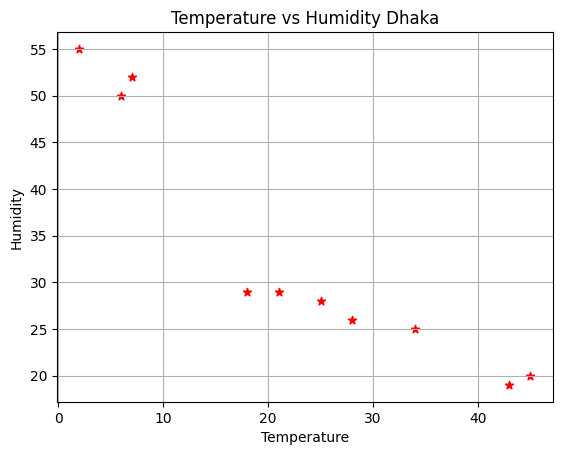

In [92]:
#1
temperature_dhaka = [25, 34, 21, 45, 28, 6, 43, 18, 7, 2]
humidity_dhaka     = [28, 25, 29, 20, 26, 50, 19, 29, 52, 55]
plt.figure()
plt.scatter(temperature_dhaka, humidity_dhaka, marker="*", color="red")
plt.title("Temperature vs Humidity Dhaka")
plt.xlabel("Temperature")
plt.ylabel("Humidity")
plt.grid(True)
plt.show()

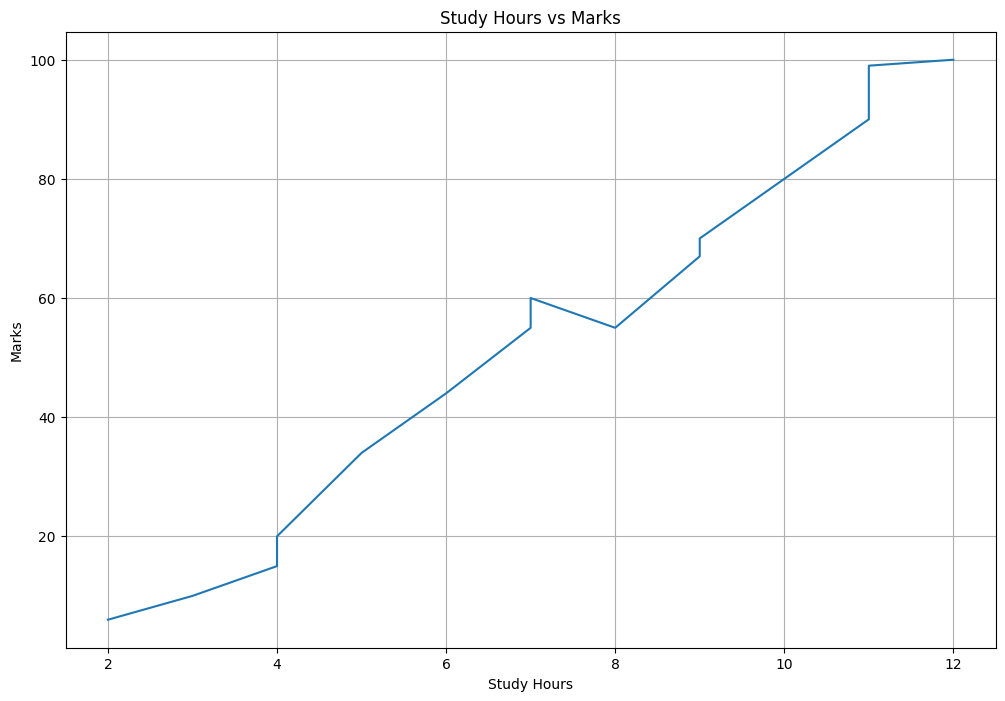

In [93]:
#2
study_hours = [2, 3, 4, 4, 5, 6, 7, 7, 8, 9, 9, 10, 11, 11, 12]
marks       = [6, 10, 15, 20, 34, 44, 55, 60, 55, 67, 70, 80, 90, 99, 100]
plt.figure(figsize=(12, 8))
plt.plot(study_hours, marks)
plt.title("Study Hours vs Marks")
plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.grid(True)
plt.show()

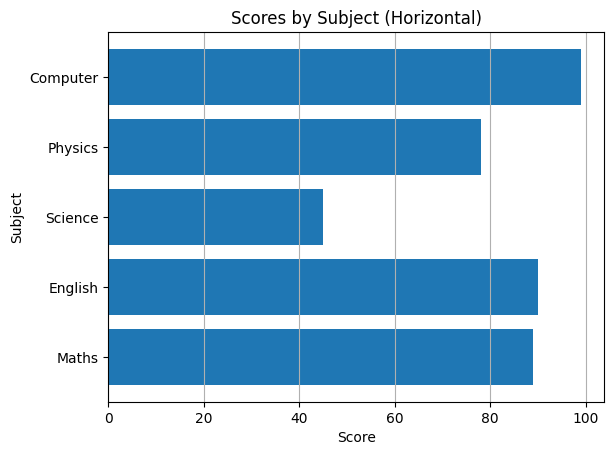

In [94]:
#3
subjects = ["Maths", "English", "Science", "Physics", "Computer"]
marks_subj = [89, 90, 45, 78, 99]
plt.figure()
plt.barh(subjects, marks_subj)
plt.title("Scores by Subject (Horizontal)")
plt.xlabel("Score")
plt.ylabel("Subject")
plt.grid(axis="x")
plt.show()

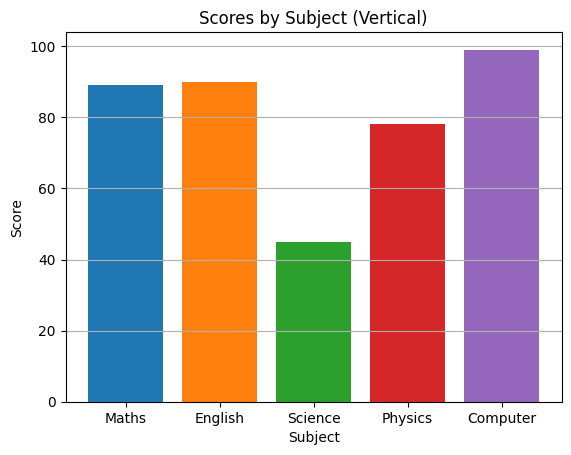

In [95]:
#4
plt.figure()
colors = ["C0", "C1", "C2", "C3", "C4"]
plt.bar(subjects, marks_subj, color=colors)
plt.title("Scores by Subject (Vertical)")
plt.xlabel("Subject")
plt.ylabel("Score")
plt.grid(axis="y")
plt.show()


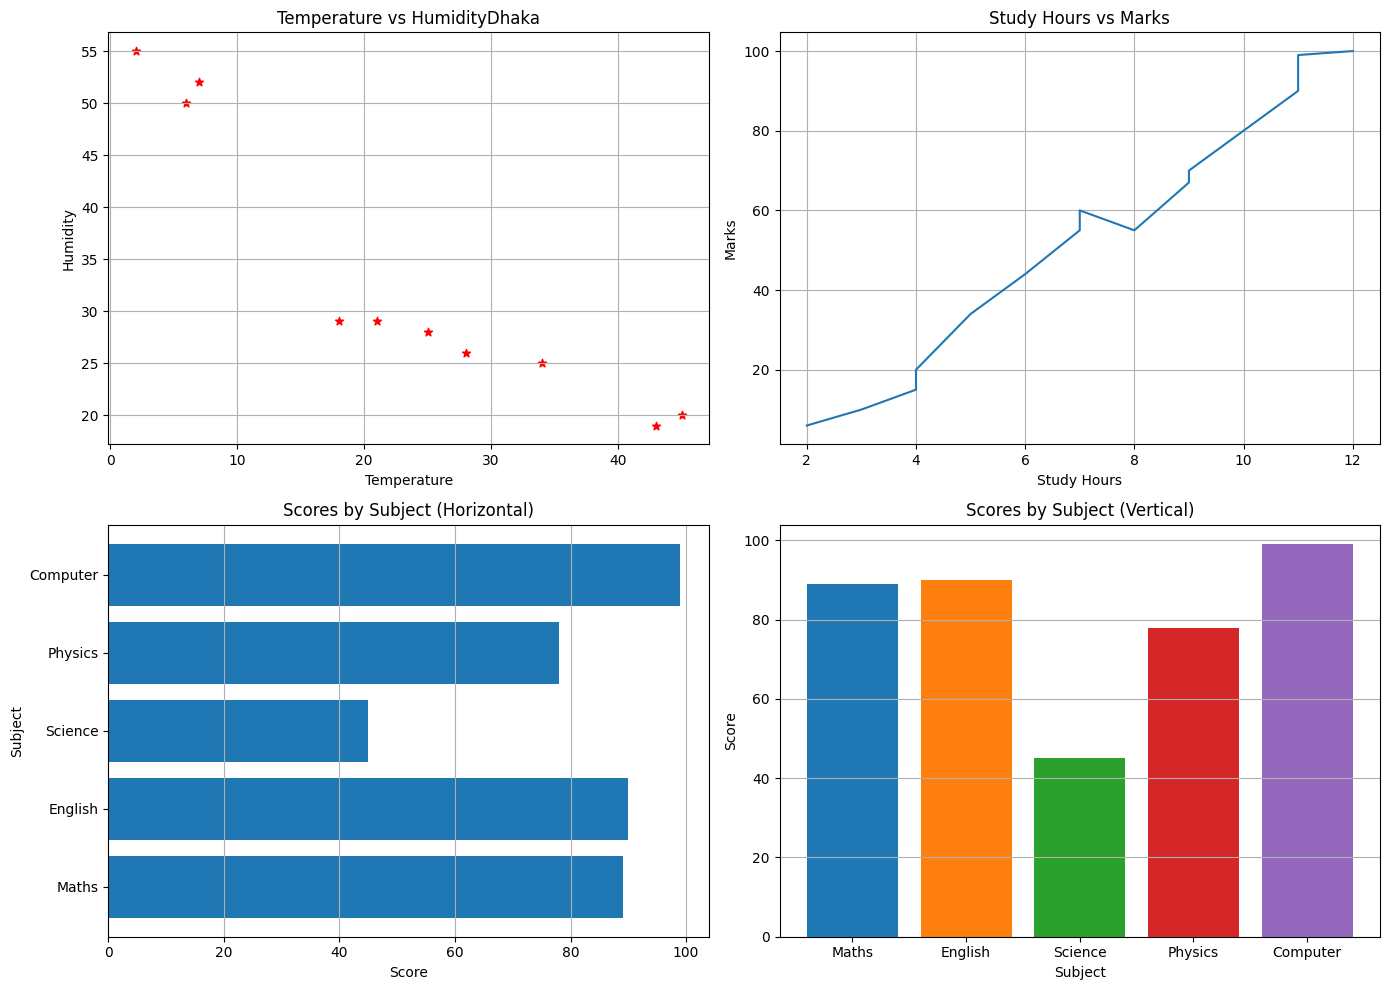

In [96]:
#5
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

ax = axes[0, 0]
ax.scatter(temperature_dhaka, humidity_dhaka, marker="*", color="red")
ax.set_title("Temperature vs HumidityDhaka")
ax.set_xlabel("Temperature")
ax.set_ylabel("Humidity")
ax.grid(True)

ax = axes[0, 1]
ax.plot(study_hours, marks)
ax.set_title("Study Hours vs Marks")
ax.set_xlabel("Study Hours")
ax.set_ylabel("Marks")
ax.grid(True)

ax = axes[1, 0]
ax.barh(subjects, marks_subj)
ax.set_title("Scores by Subject (Horizontal)")
ax.set_xlabel("Score")
ax.set_ylabel("Subject")
ax.grid(axis="x")

ax = axes[1, 1]
colors = ["C0", "C1", "C2", "C3", "C4"]
ax.bar(subjects, marks_subj, color=colors)
ax.set_title("Scores by Subject (Vertical)")
ax.set_xlabel("Subject")
ax.set_ylabel("Score")
ax.grid(axis="y")

plt.tight_layout()
plt.show()
